# 21MIA1017 KURUPATI SAI CHARAN LAB-5

# TASK-1

In [ ]:
import cv2
import numpy as np
import time  # Import this for adding delays

from google.colab.patches import cv2_imshow  # Import this for displaying images in Colab

video_path = "/content/rrr.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read the first frame
ret, prev_frame = cap.read()

if not ret:
    print("Error: Could not read the video frame.")
    exit()

# Convert the first frame to grayscale
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Initialize a kernel for morphological operations (optional)
kernel = np.ones((5, 5), np.uint8)

# Get the frames per second (FPS) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

while True:
    # Read the next frame
    ret, frame = cap.read()

    if not ret:
        break

    # Get the current timestamp of the frame (in seconds)
    frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)
    timestamp = frame_number / fps

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and the previous frame
    diff = cv2.absdiff(prev_gray, gray)

    # Apply a threshold to the difference image to get the regions with significant changes
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Optional: Apply morphological operations to remove noise and fill in the gaps
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours of the detected motion
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw rectangles around the detected motion regions
    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue  # Ignore small movements
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Add label "Motion" on top of the detected motion box
        cv2.putText(frame, "Motion", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Format and display the timestamp on the frame
    timestamp_text = f"Timestamp: {timestamp:.2f} seconds"
    cv2.putText(frame, timestamp_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display the frame with motion detection and timestamp using cv2_imshow
    cv2_imshow(frame)

    # Update the previous frame
    prev_gray = gray.copy()

    # Add a short delay to simulate video playback speed
    time.sleep(1 / fps)

# Release the video capture object
cap.release()

# TASK-2


Detected sentiments: ['neutral', 'happy', 'happy', 'happy', 'neutral']
Overall sentiment: happy


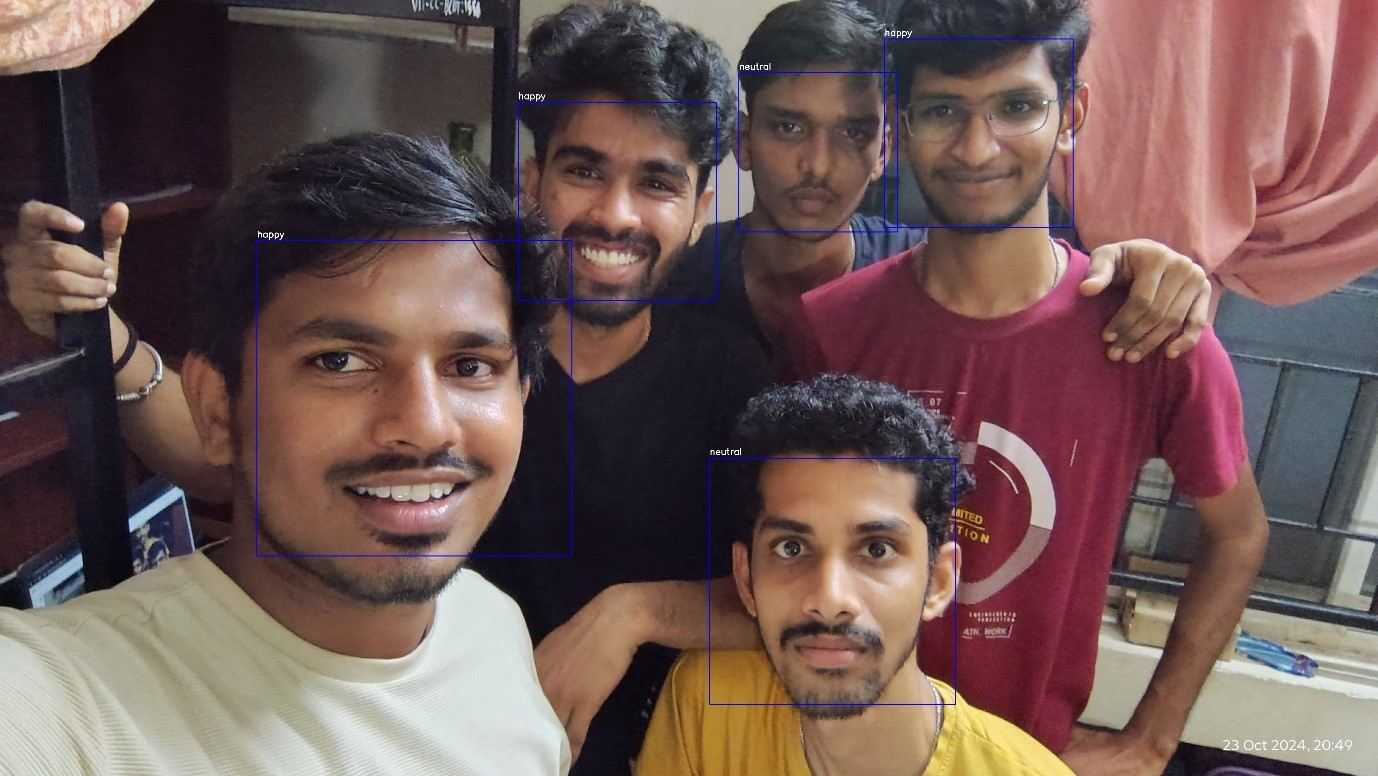

In [18]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from collections import Counter

# Initialize the Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to detect faces in an image
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    return faces

# Function to classify basic emotions based on facial geometry
def classify_emotion(face_img):
    gray_face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

    # Detect eyes in the face image
    eyes = eye_cascade.detectMultiScale(gray_face, scaleFactor=1.1, minNeighbors=5)
    mouth_region = None

    # Assuming the mouth is below the eyes; get a rough bounding box for it
    if len(eyes) > 0:
        (ex, ey, ew, eh) = eyes[0]  # Take the first detected eye
        mouth_region = gray_face[ey + eh : ey + eh + 20, ex : ex + ew]  # Roughly extract the mouth region

    # Classify emotions based on simple rules
    if mouth_region is not None and np.mean(mouth_region) > 100:  # Arbitrary threshold for "smile"
        return "Happy"
    else:
        return "Sad"

# Function to process images in a directory
def process_images(image_directory):
    overall_sentiments = []

    # Loop through each image in the directory
    for filename in os.listdir(image_directory):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_directory, filename)
            img = cv2.imread(image_path)

            # Detect faces
            faces = detect_faces(img)

            # Analyze each detected face
            sentiments = []
            for (x, y, w, h) in faces:
                # Extract face region
                face_img = img[y:y+h, x:x+w]

                # Classify emotion for the face
                emotion = classify_emotion(face_img)
                sentiments.append(emotion)

                # Draw rectangle around the face and put the emotion label
                cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
                cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

            # Determine the overall sentiment for the image
            if sentiments:
                overall_sentiment = Counter(sentiments).most_common(1)[0][0]
                overall_sentiments.append(overall_sentiment)

                # Print detected emotions and overall sentiment
                print(f"Detected Sentiments in {filename}: {sentiments}")
                print(f"Overall Sentiment for {filename}: {overall_sentiment}")

            # Show the image with detected faces and emotions
            cv2_imshow(img)

    # Final analysis of overall sentiments
    if overall_sentiments:
        final_overall_sentiment = Counter(overall_sentiments).most_common(1)[0][0]
        print(f"Final Overall Sentiment across all images: {final_overall_sentiment}")

# Example usage
image_directory = '/content/crowd_images'  
process_images(image_directory)
